In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Resultsd.csv')

In [3]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

In [4]:
df.set_index('datetime', inplace=True)

In [5]:
monthly_pizza_counts = df.groupby([pd.Grouper(freq='M'), 'pizza_id'])['order_details_id'].count().reset_index()

In [6]:
monthly_pizza_counts.columns = ['month', 'pizza_id', 'count']

In [7]:
top_pizzas = monthly_pizza_counts.groupby('pizza_id')['count'].sum().nlargest(10).index

In [8]:
monthly_pizza_counts = monthly_pizza_counts[monthly_pizza_counts['pizza_id'].isin(top_pizzas)]

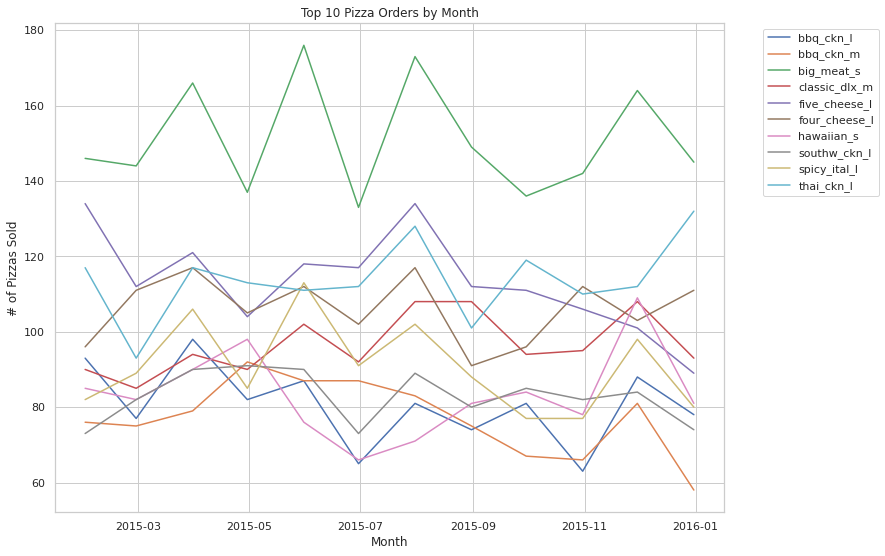

In [9]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style("whitegrid")
sns.lineplot(x='month', y='count', hue='pizza_id', data=monthly_pizza_counts)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Top 10 Pizza Orders by Month')
plt.xlabel('Month')
plt.ylabel('# of Pizzas Sold')

plt.savefig('CHART2.png', dpi=300, bbox_inches='tight')